Plot time split



In [13]:
import pandas as pd
import matplotlib.pyplot as plt



time_split_age_random_forest = pd.read_csv('./time-splitting/age_inference_random_forest.csv', header=None)
time_split_age_logistic_regression = pd.read_csv('./time-splitting/age_inference_logistic_regression.csv', header=None)

time_split_gender_random_forest = pd.read_csv('./time-splitting/gender_inference_random_forest.csv', header=None)
time_split_gender_logistic_regression = pd.read_csv('./time-splitting/gender_inference_logistic_regression.csv', header=None)


time_split_age_random_forest.head(8)

,0,1,2,3,4,5
0,0.25,0.693959,0.693997,0.694019,0.694020,0.694020
1,0.50,0.753273,0.753159,0.753432,0.753181,0.753181
2,0.75,0.798300,0.798335,0.798356,0.798346,0.798346
3,1.00,0.810422,0.810433,0.810433,0.810433,0.810433


In [14]:
def perform_plot(random_forest, logistic_regression, metric, title, kind='line'):
    plt.figure()
    plt.style.use('ggplot')
    if kind == 'bar':
        dff = pd.concat([random_forest[metric].to_frame(),logistic_regression[metric].to_frame()], axis=1)
        dff.plot(kind=kind)
    else:
        random_forest[metric].plot(kind=kind)
        logistic_regression[metric].plot(kind=kind)
    plt.title(title)
    indices = range(random_forest.shape[0])
    labels = random_forest[0].to_list()
    plt.xticks(indices, labels, rotation=90)


* Gender inference

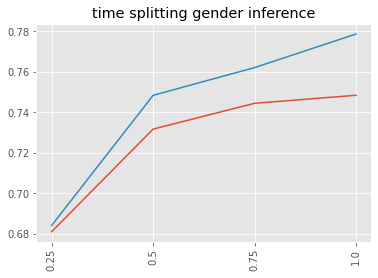

In [15]:
perform_plot(time_split_gender_random_forest, time_split_gender_logistic_regression, 1,
             'time splitting gender inference')

* Age inference

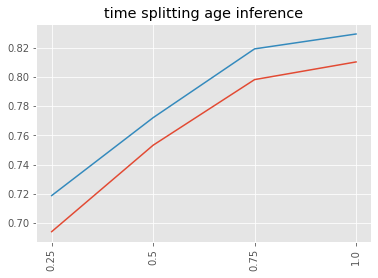

In [16]:
perform_plot(time_split_age_random_forest, time_split_age_logistic_regression, 1,
             'time splitting age inference')